### Research, Development and Innovation, in Portuguese: Pesquisa, Desenvolvimento e Inovação (PD&I) 

This notebook analyzes research, development and innovation data in the oil industry sponsored by companies in Brazil. Projects can be carried out by universities, research institutes or private companies.

"Law 9478, of 08/06/1997, established for the National Agency of Petroleum, Natural Gas and Biofuels (ANP), among others, the attribution of stimulating research and the adoption of new technologies for the sector. In view of this, the contracts entered into between the Agency and the Oil Companies for the exploration, development and production of oil and natural gas have, since Round Zero, Research, Development and Innovation clauses (RD&I Clause - PD&I in Portuguese) that establish the obligation to carry out of expenses qualified as RD&I by the Oil Companies.

The RD&I clause establishes the application of a percentage of the gross revenue from production, according to the specific conditions of each type of contract. The ANP is responsible for analyzing, approving, monitoring and supervising the application of resources arising from the RD&I clause."

The dataset was downloaded in August 27, 2022 from https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/dados-abertos-pesquisa-e-desenvolvimento-e-inovacao-pd-i

There may be errors and any feedback is appreciated.

#### Some projects are carried out by universities, service companies and oil companies. In these cases it is not possible to know how the work or income was shared.

#### Some companies share the concession of some fields. In these cases it is not possible to know how the investment was shared.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
pd.options.mode.chained_assignment = None

Data loading needs to take into account decimal and special characters.

In [2]:
data=pd.read_csv('projetos-rt-3-2015.csv',sep=';', encoding='latin1',decimal=',', parse_dates=['DAT_INICIO'], dayfirst=True)

In [3]:
data.dtypes

NUM_PROJETO_ANP            object
TITULO                     object
PROPONENTE                 object
QUALIFICACAO               object
OBJETIVO                   object
AREA                       object
TEMA                       object
SUB_TEMA                   object
EXECUTORES_UPS             object
EXECUTORES_EMP             object
NUM_AUTORIZACAO            object
PRAZO                       int64
DAT_INICIO         datetime64[ns]
VAL_CLAUSULA              float64
dtype: object

## The dataset

In [4]:
data.sort_values(by='DAT_INICIO', inplace=True)
data.reset_index(drop=True, inplace=True)
data

,NUM_PROJETO_ANP,TITULO,PROPONENTE,QUALIFICACAO,OBJETIVO,AREA,TEMA,SUB_TEMA,EXECUTORES_UPS,EXECUTORES_EMP,NUM_AUTORIZACAO,PRAZO,DAT_INICIO,VAL_CLAUSULA
0,20005-5,TAILS - Desenvolvimento de Sistema de Estabili...,REPSOL SINOPEC,PROTÓTIPO OU UNIDADE PILOTO,O objetivo é desenvolver um protótipo de um si...,TEMAS TRANSVERSAIS,SEGURANÇA E MEIO AMBIENTE,MONITORAMENTO E CONTROLE DE INSTALAÇÕES ONSHOR...,UFRJ - GSCAR - Grupo de Simulação e Controle e...,13ROBOTICS ROBOTICA LTDA - ME || REPSOL SINOPEC,NaN,29,2016-03-01,7302875.36
1,20006-3,RSB SPEED Fase 3: Modelo computacional destina...,REPSOL SINOPEC,PESQUISA APLICADA,Desenvolver e testar o protótipo de um modelo ...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...","TÉCNICAS DE AQUISIÇÃO, PROCESSAMENTO E INTERPR...",SENAI-BA - SENAI CIMATEC,GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCI...,NaN,22,2016-03-15,5553796.23
2,20004-8,DESENVOLVIMENTO DE UM SIMULADOR PARA ESCOAMENT...,PETROGAL BRASIL,PESQUISA APLICADA,"Pretende-se desenvolver um novo simulador, den...",EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,ENGENHARIA DE POÇO,ELEVAÇÃO ARTIFICIAL E ESCOAMENTO MULTIFÁSICO,NaN,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,NaN,42,2016-05-15,12115023.33
3,20002-2,CYCLOP WP1/3 INFRAESTRUTURA - IMPLANTAÇÃO DE I...,REPSOL SINOPEC,INFRAESTRUTURA - REFORMA E EQUIPAMENTOS,Melhoria da infraestrutura laboratorial para p...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ACUMULAÇÕES NÃO CONVENCIONAIS (UNCONVENCIONAL ...,UFRJ - LABTECH - Laboratório de Tecnologia do ...,NaN,0336/2016,18,2016-07-01,1468498.99
4,20008-9,Soluções Submarinas Enxutas para Águas Rasas,EQUINOR BRASIL,PESQUISA APLICADA,O mercado de águas profundas (DW) está cada ve...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"PRODUÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDAS,...",TÉCNICAS E EQUIPAMENTOS SUBMARINOS DE BOMBEAMENTO,NaN,EQUINOR BRASIL,NaN,10,2016-08-15,118221.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,22676-1,Desenvolvimento de Sistema robótico especialis...,SHELL BRASIL,PROTÓTIPO OU UNIDADE PILOTO,"O objetivo deste projeto é, a partir dos resul...",TEMAS TRANSVERSAIS,"AVALIAÇÃO DA CONFORMIDADE, MONITORAMENTO E CON...","AUTOMAÇÃO, CONTROLE, INSTRUMENTAÇÃO E METROLOGIA",SENAI-BA - SENAI CIMATEC || SENAI-SC - Institu...,MARINE PRODUCTION SYSTEMS DO BRASIL LTDA || SH...,NaN,30,2022-03-15,59382718.54
2588,22756-1,EV-01775 SITUA-PROSIM - Módulo de Intervenção ...,PETROBRAS,PESQUISA APLICADA,O Objetivo deste projeto é desenvolver Ferrame...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"PRODUÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDAS,...","UNIDADES FLUTUANTES DE PRODUÇÃO, SISTEMAS DE A...",NaN,PETROBRAS,NaN,12,2022-03-16,64090.00
2589,22732-2,Corrosão em alta temperatura de cortes de petr...,PETROBRAS,PESQUISA BÁSICA,Realizar ensaios em autoclave a partir de cort...,ABASTECIMENTO,REFINO,"OTIMIZAÇÃO E CONFIABILIDADE DE EQUIPAMENTOS, P...",NaN,PETROBRAS,NaN,21,2022-03-16,732500.09
2590,22688-6,Petrologia de Rochas Lamíticas,PETROBRAS,PESQUISA APLICADA,O objetivo principal é a aplicação das facilid...,EXPLORAÇÃO E PRODUÇÃO DE PETRÓLEO E GÁS NATURA...,"EXPLORAÇÃO - HORIZONTE PRÉ-SAL, ÁGUAS PROFUNDA...",ESTUDOS GEOLÓGICOS DAS BACIAS SEDIMENTARES,UFRGS - Instituto de Geociências UFRGS,NaN,NaN,24,2022-03-18,1374631.74


#### First and last project started in the dataset

In [5]:
data.PROPONENTE.iloc[0],data.DAT_INICIO.iloc[0]

('REPSOL SINOPEC', Timestamp('2016-03-01 00:00:00'))

In [6]:
data.PROPONENTE.iloc[-1],data.DAT_INICIO.iloc[-1]

('SHELL BRASIL', Timestamp('2022-03-25 00:00:00'))

## Projects per year

In [7]:
pd.options.display.float_format = '{:.2f}'.format
project_year=data.groupby(['DAT_INICIO']).size().reset_index(name='Projects').sort_values(by='DAT_INICIO',ascending=[False])
project_year=project_year.groupby(project_year.DAT_INICIO.dt.to_period("Y")).sum()
project_year.index.names = ['Year']
project_year.reset_index(inplace=True)
project_year

,Year,Projects
0,2016,9
1,2017,323
2,2018,606
3,2019,705
4,2020,179
5,2021,712
6,2022,58


#### Total amount of projects started between 2016-03-01 and 2022-03-25

In [8]:
project_year.Projects.sum()

2592

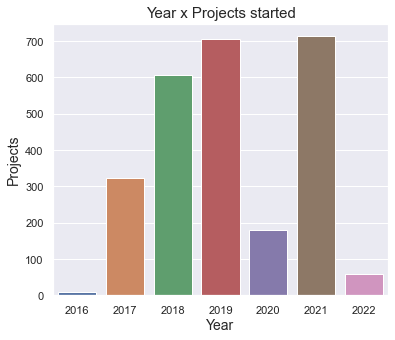

In [9]:
sns.set()
plt.figure(figsize = (6,5))

sns.barplot(x='Year', y='Projects', data=project_year, orient = 'v')

plt.title('Year x Projects started',fontsize=15)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Projects',fontsize=14)
plt.show()

## Investment per year

In [10]:
invest_year=data.groupby(data.DAT_INICIO.dt.to_period("Y")).sum()
invest_year.drop(['PRAZO'],axis=1,inplace=True)
invest_year=invest_year.rename(columns = {'VAL_CLAUSULA':'Investment (R$ Millions)'})
invest_year['Investment (R$ Millions)'] = invest_year['Investment (R$ Millions)']/1000000.
invest_year.index.names = ['Year']
invest_year.reset_index(inplace=True)
invest_year

,Year,Investment (R$ Millions)
0,2016,41.78
1,2017,1026.94
2,2018,2107.57
3,2019,3207.87
4,2020,1224.34
5,2021,1912.10
6,2022,248.78


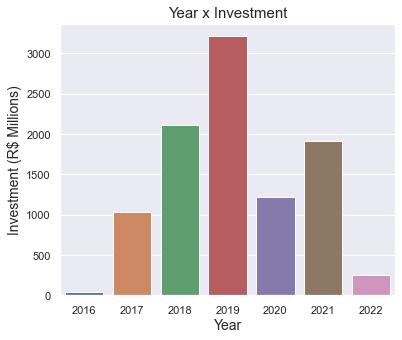

In [11]:
sns.set()
plt.figure(figsize = (6,5))

sns.barplot(x='Year', y='Investment (R$ Millions)', data=invest_year, orient = 'v')

plt.title('Year x Investment',fontsize=15)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Investment (R$ Millions)',fontsize=14)
plt.show()

## Sponsoring companies

**Important note:** Some companies share the concession of some fields and from the dataset it is not possible to address the percentage of the budget invested by each of them in this analysis. These cases are shown below where the names of the companies are separated by **| |**. Therefore, differences can be found when compared with the analysis performed by the National Oil Agency (ANP).

In [12]:
data.PROPONENTE.unique()

array(['REPSOL SINOPEC', 'PETROGAL BRASIL', 'EQUINOR BRASIL', 'BG BRASIL',
       'ENAUTA ENERGIA', 'PETROBRAS', 'PARNAÍBA GÁS NATURAL',
       'CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS || SHELL BRASIL || TOTALENERGIES EP',
       'SHELL BRASIL',
       'EQUINOR BRASIL || PETROBRAS || PETROGAL BRASIL || REPSOL SINOPEC || SHELL BRASIL',
       'PARNAÍBA GÁS NATURAL || PETROBRAS', 'PRIO BRAVO',
       'EQUINOR BRASIL || SHELL BRASIL', 'TOTALENERGIES EP',
       'EQUINOR BRASIL || REPSOL SINOPEC', 'ENEVA', 'SINOCHEM PETRÓLEO',
       'GEOPARK BRASIL', 'PETROBRAS || SHELL BRASIL',
       'EQUINOR BRASIL || EQUINOR ENERGY',
       'EQUINOR BRASIL || TOTALENERGIES EP',
       'REPSOL SINOPEC || SHELL BRASIL', 'EQUINOR ENERGY',
       'PETRÓLEO BRASILEIRO S/A - PETROBRAS || TOTALENERGIES EP',
       'EQUINOR ENERGY || TOTALENERGIES EP',
       'EQUINOR ENERGY || REPSOL SINOPEC', 'EXXONMOBIL BRASIL',
       'PETRONAS', 'EXXONMOBIL BRASIL || REPSOL SINOPEC || SHELL BRASIL'],
      dtype=obj

#### Below, the dataframe is sorted in ascending order of sponsored projects. 

In [13]:
sponsor = []
pd.options.display.float_format = '{:.2f}'.format
sponsor=data.groupby(['PROPONENTE']).size().reset_index(name='Projects').sort_values(by='Projects',ascending=[False])
sponsor['Investment (R$)'] = (data.groupby(["PROPONENTE"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
sponsor=sponsor.rename(columns = {'PROPONENTE':'Sponsor'})

In [14]:
sponsor

,Sponsor,Projects,Investment (R$)
18,PETROBRAS,2156,6214117686.95
26,SHELL BRASIL,161,1457079203.62
24,REPSOL SINOPEC,50,279722354.94
20,PETROGAL BRASIL,47,435150105.98
0,BG BRASIL,30,243683536.27
1,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,30,554955990.94
4,EQUINOR BRASIL,23,53066257.07
27,SINOCHEM PETRÓLEO,20,51767196.28
28,TOTALENERGIES EP,14,78921910.59
5,EQUINOR BRASIL || EQUINOR ENERGY,13,84740506.28


#### Merge Equinor, which appears three times in the dataframe 

In [15]:
sponsor.at[4,'Sponsor'] = 'EQUINOR'
sponsor.at[4,'Projects'] = sponsor.loc[4][1] + sponsor.loc[5][1] + sponsor.loc[10][1]
sponsor.at[4,'Investment (R$)'] = sponsor.loc[4][2] + sponsor.loc[5][2] + sponsor.loc[10][2] 
sponsor.drop([5,10], inplace = True )

#### Merge Equinor and Total Energies, which appears twice in the dataframe

In [16]:
sponsor.at[9,'Sponsor'] = 'EQUINOR || TOTAL ENERGIES'
sponsor.at[9,'Projects'] = sponsor.loc[9][1] + sponsor.loc[12][1] 
sponsor.at[9,'Investment (R$)'] = sponsor.loc[9][2] + sponsor.loc[12][2] 
sponsor.drop([12], inplace = True )

#### Merge Equinor and Repsol Sinopec, which appears twice in the dataframe and add new columns

In [17]:
sponsor.at[7,'Sponsor'] = 'EQUINOR || REPSOL SINOPEC'
sponsor.at[7,'Projects'] = sponsor.loc[7][1] + sponsor.loc[11][1] 
sponsor.at[7,'Investment (R$)'] = sponsor.loc[7][2] + sponsor.loc[11][2] 
sponsor.drop([11], inplace = True )

### Projects x Sponsoring companies

#### Petrobras sponsored more than 80% of the projects between March 2016 and March 2022.

In [18]:
#Add columns and reorder
sponsor['% of Projects'] = (sponsor.Projects / sum(sponsor.Projects.values)).round(decimals=2)*100
sponsor['Investment (R$ Millions)'] = sponsor['Investment (R$)']/1000000.

sponsor.sort_values(by='Projects',ascending=[False], inplace=True)
sponsor.index = np.arange(len(sponsor))

sponsor

,Sponsor,Projects,Investment (R$),% of Projects,Investment (R$ Millions)
0,PETROBRAS,2156,6214117686.95,83.00,6214.12
1,SHELL BRASIL,161,1457079203.62,6.00,1457.08
2,REPSOL SINOPEC,50,279722354.94,2.00,279.72
3,PETROGAL BRASIL,47,435150105.98,2.00,435.15
4,EQUINOR,44,152187618.46,2.00,152.19
5,BG BRASIL,30,243683536.27,1.00,243.68
6,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,30,554955990.94,1.00,554.96
7,SINOCHEM PETRÓLEO,20,51767196.28,1.00,51.77
8,TOTALENERGIES EP,14,78921910.59,1.00,78.92
9,PETRONAS,7,54612012.69,0.00,54.61


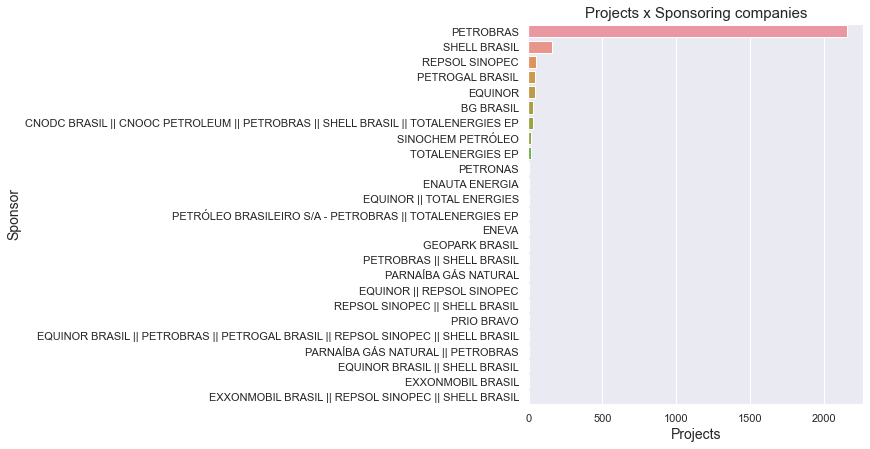

In [19]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Sponsor', data=sponsor, orient = 'h')

plt.title('Projects x Sponsoring companies',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

#### Top 10 companies sorted by projects

The order of companies changes in relation to the amount of sponsored projects and investments.


In [20]:
sponsor_10=sponsor.sort_values(by='Projects',ascending=[False])[:9]
sponsor_10

,Sponsor,Projects,Investment (R$),% of Projects,Investment (R$ Millions)
0,PETROBRAS,2156,6214117686.95,83.00,6214.12
1,SHELL BRASIL,161,1457079203.62,6.00,1457.08
2,REPSOL SINOPEC,50,279722354.94,2.00,279.72
3,PETROGAL BRASIL,47,435150105.98,2.00,435.15
4,EQUINOR,44,152187618.46,2.00,152.19
5,BG BRASIL,30,243683536.27,1.00,243.68
6,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,30,554955990.94,1.00,554.96
7,SINOCHEM PETRÓLEO,20,51767196.28,1.00,51.77
8,TOTALENERGIES EP,14,78921910.59,1.00,78.92


In [21]:
sponsor_10.loc[len(sponsor_10.index)] = ['OTHERS',sum(sponsor.Projects[9:]), 0, 0,0]

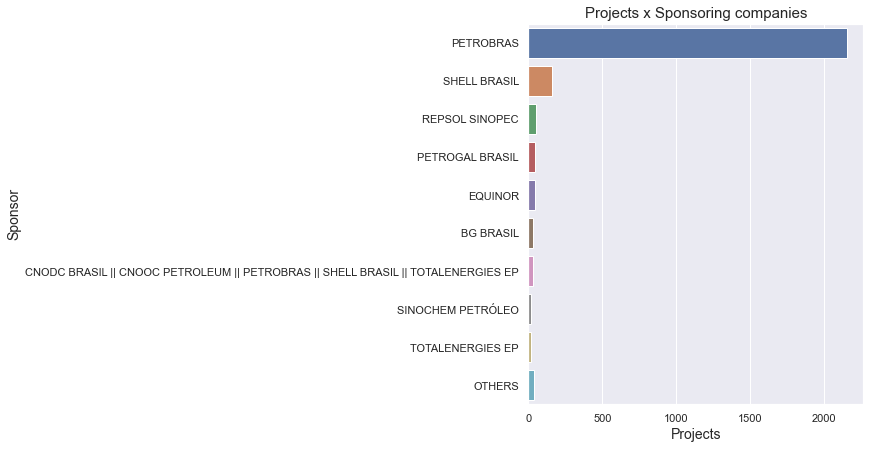

In [22]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Sponsor', data=sponsor_10, orient = 'h')

plt.title('Projects x Sponsoring companies',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

### Investiment x Sponsoring companies

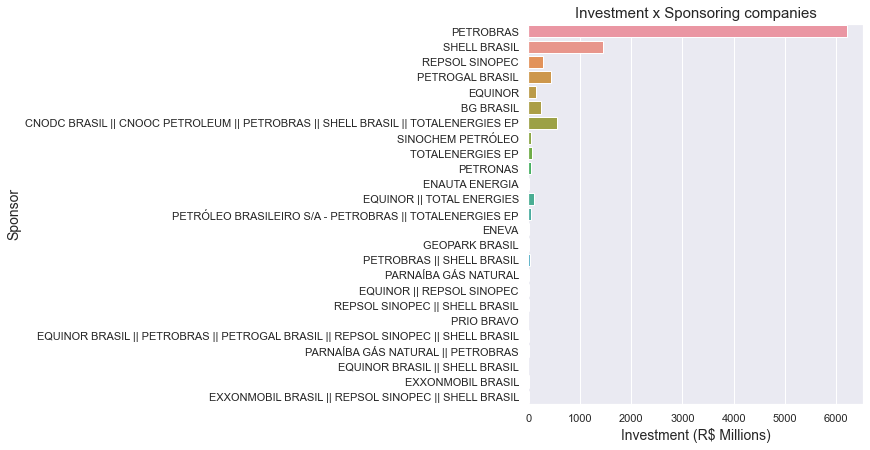

In [23]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Investment (R$ Millions)', y='Sponsor', data=sponsor, orient = 'h')

plt.title('Investment x Sponsoring companies',fontsize=15)
plt.xlabel('Investment (R$ Millions)',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

In [24]:
sponsor_invest=sponsor.sort_values(by='Investment (R$ Millions)',ascending=[False])
sponsor_invest.reset_index(drop=True, inplace=True)
sponsor_invest

,Sponsor,Projects,Investment (R$),% of Projects,Investment (R$ Millions)
0,PETROBRAS,2156,6214117686.95,83.00,6214.12
1,SHELL BRASIL,161,1457079203.62,6.00,1457.08
2,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,30,554955990.94,1.00,554.96
3,PETROGAL BRASIL,47,435150105.98,2.00,435.15
4,REPSOL SINOPEC,50,279722354.94,2.00,279.72
5,BG BRASIL,30,243683536.27,1.00,243.68
6,EQUINOR,44,152187618.46,2.00,152.19
7,EQUINOR || TOTAL ENERGIES,4,108630138.48,0.00,108.63
8,TOTALENERGIES EP,14,78921910.59,1.00,78.92
9,PETRÓLEO BRASILEIRO S/A - PETROBRAS || TOTALEN...,4,58075939.77,0.00,58.08


#### Top 10 companies sorted by investment

In [25]:
sponsor_invest_10=[]
sponsor_invest_10=sponsor_invest[:9]
sponsor_invest_10.loc[len(sponsor_invest_10.index)] = ['OTHERS',0, 0, 0,sum(sponsor_invest['Investment (R$ Millions)'][9:])]

In [26]:
sponsor_invest_10

,Sponsor,Projects,Investment (R$),% of Projects,Investment (R$ Millions)
0,PETROBRAS,2156,6214117686.95,83.00,6214.12
1,SHELL BRASIL,161,1457079203.62,6.00,1457.08
2,CNODC BRASIL || CNOOC PETROLEUM || PETROBRAS |...,30,554955990.94,1.00,554.96
3,PETROGAL BRASIL,47,435150105.98,2.00,435.15
4,REPSOL SINOPEC,50,279722354.94,2.00,279.72
5,BG BRASIL,30,243683536.27,1.00,243.68
6,EQUINOR,44,152187618.46,2.00,152.19
7,EQUINOR || TOTAL ENERGIES,4,108630138.48,0.00,108.63
8,TOTALENERGIES EP,14,78921910.59,1.00,78.92
9,OTHERS,0,0.00,0.00,244.92


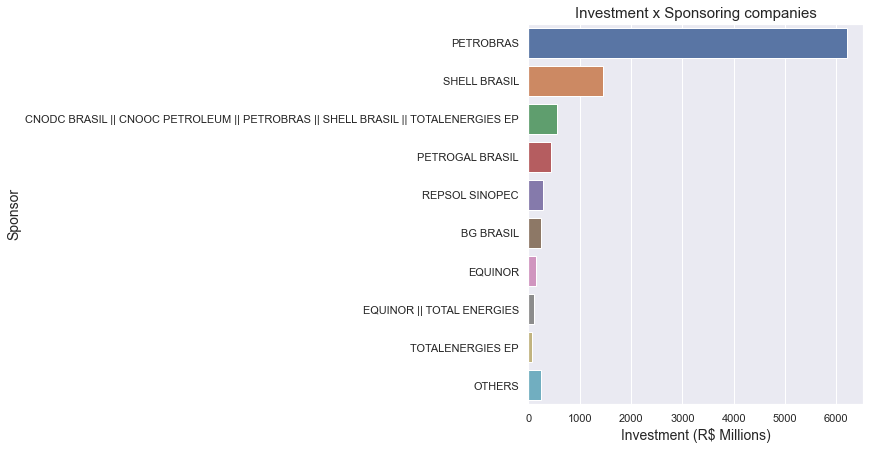

In [27]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Investment (R$ Millions)', y='Sponsor', data=sponsor_invest_10, orient = 'h')

plt.title('Investment x Sponsoring companies',fontsize=15)
plt.xlabel('Investment (R$ Millions)',fontsize=14)
plt.ylabel('Sponsor',fontsize=14)
plt.show()

## Granted - Universities and research centers

In [28]:
data.EXECUTORES_UPS.unique()

array(['UFRJ - GSCAR - Grupo de Simulação e Controle em Automação e Robótica',
       'SENAI-BA - SENAI CIMATEC', nan,
       'UFRJ - LABTECH - Laboratório de Tecnologia do Hidrogênio',
       'UNICAMP - Centro de Estudos de Petróleo - CEPETRO',
       'UFRJ - LPCM - Laboratório de Processamento e Caracterização de Materiais',
       'USP - Laboratório de Detergentes e Polímeros',
       'UFRJ - Laboratório de Instrumentação e Fotônica',
       'PUC-RS - Faculdade de Engenharia',
       'PUC-Rio - Laboratório de microhidrodinâmica e escoamento em meios porosos',
       'ISdB - INSTITUTO ISDB FLOWTECH',
       'IF-BA - Grupo de Pesquisa sobre Tecnologia em Saúde  || UFBA - Laboratorio de Biotecnologia e Ecologia de Microrganismos (LABEM)',
       'UFF - ADDLabs-Laboratório de Documentação Ativa e Design Inteligente',
       'IPT - Instituto de Pesquisas Tecnológicas do Estado de SP SA - IPT',
       'UFRN - Grupo de Pesquisa em Ciências do Mar e Ambientais',
       'UFG - Instituto de Q

#### Universities - abbreviation

In [29]:
Universities = data['EXECUTORES_UPS'].str.split(' - ').str[0]
Universities= Universities.str.split('     ').str[0]
Universities.unique()

array(['UFRJ', 'SENAI-BA', nan, 'UNICAMP', 'USP', 'PUC-RS', 'PUC-Rio',
       'ISdB', 'IF-BA', 'UFF', 'IPT', 'UFRN', 'UFG', 'UTFPR', 'UFV',
       'ITA', 'UNESP', 'UFC', 'UFMG', 'FURB', 'UFRN || UFRN', 'UFBA',
       'UFAL', 'LACTEC', 'UFPR', 'ITD', 'UNISINOS', 'UFU', 'FGV',
       'UFSCar', 'UFSC', 'UFCG', 'SENAI-RJ', 'UFRRJ', 'CNPEM', 'UFSM',
       'UFPE', 'ON', 'UEM', 'INT', 'ITP', 'IEAPM', 'UENF || UFBA', 'CBPF',
       'CETEM', 'CERTI', 'IPE', 'LNCC', 'UNIFEI', 'UENF', 'UFRGS',
       'CONS NAC DE DESENVOLVIMENTO CIENTIFICO E TECNOLOGICO', 'INPE',
       'UFJF', 'UCS', 'UFES', 'IPEN-CNEN', 'UFPB',
       'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO', 'SENAI-PE', 'SENAI-RN',
       'UFPA', 'SENAI-SC', 'SENAI-RS', 'UERJ', 'UEPG', 'CHM', 'UFMT',
       'UFSJ', 'UNIVAP', 'SENAI-MG', 'UnB', 'CPqD', 'SENAI-MS', 'UEZO',
       'SECIRM', 'UFPI', 'UFS', 'FURG', 'IPM', 'UDESC', 'SENAI-PR',
       'CPRM', 'IEN', 'CESAR', 'UNISANTA', 'CTEx', 'INMETRO', 'SENAI-SP',
       'CNEN', 'UFOP', 'Eldorado

In [30]:
universities = []
universities2 = []
universities = data
pd.options.display.float_format = '{:.2f}'.format
universities['Universities'] = Universities
universities2=universities.groupby(['Universities']).size().reset_index(name='Projects').sort_values(by='Projects',ascending=[False])
universities2['Grant (R$)'] = (universities.groupby(["Universities"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
universities2['Grant (R$ Millions)'] = universities2['Grant (R$)']/1000000.
universities2.drop(['Grant (R$)'], axis=1, inplace=True)

universities2

,Universities,Projects,Grant (R$ Millions)
70,UFRJ,289,1236.06
33,PUC-Rio,148,807.78
82,UNICAMP,103,355.61
88,USP,101,404.83
69,UFRGS,74,231.53
...,...,...,...
65,UFPB,1,1.08
18,INMETRO,1,5.20
63,UFOP,1,2.33
62,UFMT,1,0.82


#### Merge 'UFRN' with 'UFRN || UFRN' and 'UFRJ' with 'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO'

In [31]:
print(universities2[universities2['Universities'].str.contains('UFRN', regex=False)])

    Universities  Projects  Grant (R$ Millions)
71          UFRN        29                83.82
72  UFRN || UFRN         2                31.02


In [32]:
universities2.loc[71,'Projects']+=universities2.loc[72,'Projects']
universities2.loc[71,'Grant (R$ Millions)']+=universities2.loc[72,'Grant (R$ Millions)']

In [33]:
print(universities2.loc[universities2['Universities'] == 'UNIVERSIDADE FEDERAL DO RIO DE JANEIRO'])

                              Universities  Projects  Grant (R$ Millions)
87  UNIVERSIDADE FEDERAL DO RIO DE JANEIRO         1                 2.06


In [34]:
print(universities2.loc[universities2['Universities'] == 'UFRJ'])

   Universities  Projects  Grant (R$ Millions)
70         UFRJ       289              1236.06


In [35]:
universities2.loc[70,'Projects']+=universities2.loc[87,'Projects']
universities2.loc[70,'Grant (R$ Millions)']+=universities2.loc[87,'Grant (R$ Millions)']

In [36]:
universities2.drop([universities2.index[72], universities2.index[87]],inplace=True)

#### 89 universities or research centers developed research

In [37]:
universities2.reset_index(drop=True, inplace=True)
universities2

,Universities,Projects,Grant (R$ Millions)
0,UFRJ,290,1238.12
1,PUC-Rio,148,807.78
2,UNICAMP,103,355.61
3,USP,101,404.83
4,UFRGS,74,231.53
...,...,...,...
84,INPE,1,0.76
85,UFPB,1,1.08
86,UFOP,1,2.33
87,UFMT,1,0.82


#### Top 20 universities sorted by Projects

In [38]:
universities2_20=[]
universities2_20=universities2[:19]
universities2_20.loc[len(universities2_20.index)] = ['OTHERS', sum(universities2['Projects'][19:]), 0]

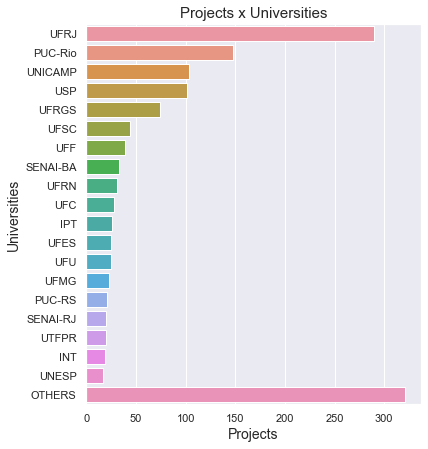

In [39]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Universities', data=universities2_20, orient = 'h')

plt.title('Projects x Universities',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Universities',fontsize=14)
plt.show()

#### Top 20 universities sorted by Grant

In [40]:
university_grant=universities2.sort_values(by='Grant (R$ Millions)',ascending=[False])
university_grant.reset_index(drop=True, inplace=True)
university_grant

,Universities,Projects,Grant (R$ Millions)
0,UFRJ,290,1238.12
1,PUC-Rio,148,807.78
2,SENAI-BA,33,411.30
3,USP,101,404.83
4,SECIRM,2,403.79
...,...,...,...
84,UFSJ,1,0.74
85,UEM,1,0.49
86,UFS,1,0.41
87,CTEx,1,0.35


In [41]:
university_grant_20=[]
university_grant_20=university_grant[:19]
university_grant_20.loc[len(university_grant_20.index)] = ['OTHERS', 0, sum(university_grant['Grant (R$ Millions)'][19:])]
university_grant_20

,Universities,Projects,Grant (R$ Millions)
0,UFRJ,290,1238.12
1,PUC-Rio,148,807.78
2,SENAI-BA,33,411.30
3,USP,101,404.83
4,SECIRM,2,403.79
5,UNICAMP,103,355.61
6,UNIFEI,13,297.19
7,UFRGS,74,231.53
8,UFF,39,189.49
9,UFSC,44,119.12


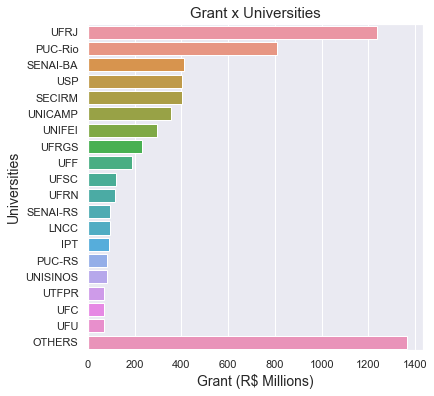

In [42]:
sns.set()
plt.figure(figsize = (6,6))

sns.barplot(x='Grant (R$ Millions)', y='Universities', data=university_grant_20, orient = 'h')

plt.title('Grant x Universities',fontsize=15)
plt.xlabel('Grant (R$ Millions)',fontsize=14)
plt.ylabel('Universities',fontsize=14)
plt.show()

## Granted - Companies

Some companies appear as Sponsor and Executors of projects. Additionally, some companies appear with Universities in the same project. Therefore, is not possible to determine row the revenue was shared. A new dataframe is created without Sponsoring companies as executors.

In [43]:
data.EXECUTORES_EMP.unique()

array(['13ROBOTICS ROBOTICA LTDA - ME || REPSOL SINOPEC',
       'GEO IMAGING SOLUCOES TECNOLOGICAS EM GEOCIENCIAS LTDA. || REPSOL SINOPEC',
       'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA || PETROGAL BRASIL',
       nan, 'EQUINOR BRASIL',
       'ORGANIZACAO NACIONAL DA INDUSTRIA DO PETROLEO - ONIP',
       'PARADIGM GEOPHYSICAL || PETROGAL BRASIL',
       'BG BRASIL || INGRAIN BRASIL SERVIÇOS DE GEOFÍSICA LTDA',
       'BG BRASIL || SCHLUMBERGER SERVICOS DE PETROLEO LTDA                      ',
       'INVISION',
       'EQUINOR BRASIL || INNOCEAN PESQUISA, DESENVOLVIMENTO E CONSULTORIA EM TECNOLOGIA NAVAL E OCEANICA LTDA',
       'BG BRASIL || GE CENTRO BRASILEIRO DE PESQUISAS LTDA.',
       'PETROBRAS', 'ACCENTURE DO BRASIL LTDA. || PARNAÍBA GÁS NATURAL',
       'DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADOR LTDA - EPP || REPSOL SINOPEC',
       'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA || REPSOL SINOPEC',
       'PETROGAL BRASIL', 'TECHNOMAR

In [44]:
companies = []
pd.options.display.float_format = '{:.2f}'.format
companies=data.groupby(['EXECUTORES_EMP']).size().reset_index(name='VAL_CLAUSULA').sort_values(by='VAL_CLAUSULA',ascending=[False])
companies['Revenue (R$)'] = (data.groupby(["EXECUTORES_EMP"]).VAL_CLAUSULA.sum().reset_index().sort_values(by='VAL_CLAUSULA',ascending=[False]).VAL_CLAUSULA).astype(float)
companies=companies.rename(columns = {'EXECUTORES_EMP':'Company','VAL_CLAUSULA':'Projects'})
companies['Revenue (R$ Millions)'] = companies['Revenue (R$)']/1000000.
companies.drop(['Revenue (R$)'],axis=1,inplace=True)
companies.sort_values(by='Revenue (R$ Millions)',ascending=[False],inplace=True)

#### Companies sorted by Revenue

In [45]:
companies

,Company,Projects,Revenue (R$ Millions)
101,PETROBRAS,1050,1969.37
126,SHELL BRASIL,74,536.47
66,HALLIBURTON || SHELL BRASIL,6,218.98
20,BG BRASIL,8,118.66
129,SHELL BRASIL || STROHM BRASIL DUTOS COMPOSITOS...,1,99.76
...,...,...,...
48,"EQUINOR BRASIL || INNOCEAN PESQUISA, DESENVOLV...",1,0.29
120,SBM OFFSHORE DO BRASIL LTDA.,1,0.26
37,DET NORSKE VERITAS LTDA || REPSOL SINOPEC,1,0.25
34,DERSALIS BRASIL TECNOLOGIA E INOVACOES EM SAUD...,1,0.12


#### Top 10 companies sorted by Revenue

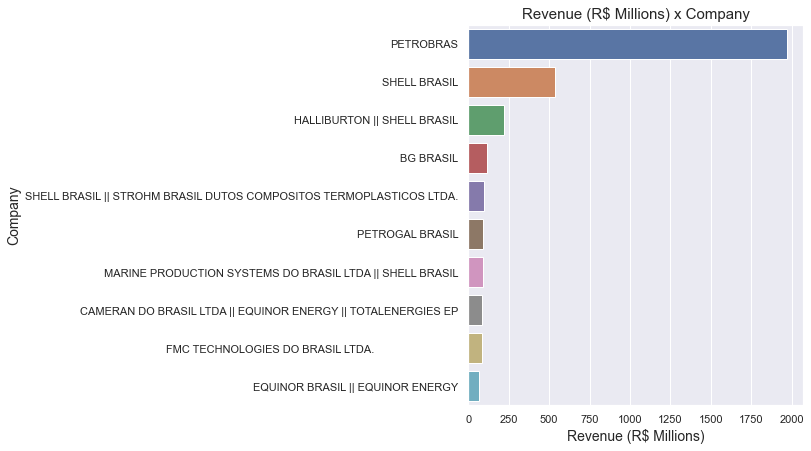

In [46]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Revenue (R$ Millions)', y='Company', data=companies[:10], orient = 'h')

plt.title('Revenue (R$ Millions) x Company',fontsize=15)
plt.xlabel('Revenue (R$ Millions)',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()

#### Top 10 companies sorted by Projects

In [47]:
companies_project=companies.sort_values(by='Projects',ascending=[False])
companies_project

,Company,Projects,Revenue (R$ Millions)
101,PETROBRAS,1050,1969.37
126,SHELL BRASIL,74,536.47
133,SINOCHEM PETRÓLEO,18,44.59
113,REPSOL SINOPEC,12,48.55
44,EQUINOR BRASIL,11,28.02
...,...,...,...
12,ASV GLOBAL DO BRASIL LTDA. || FAROL SERVICOS E...,1,8.09
16,AVEVA DO BRASIL INFORMATICA LTDA || ENGINEERIN...,1,8.65
115,REPSOL SINOPEC || SIMEX SISTEMAS DE INSPECAO M...,1,8.91
90,NAVCON NAVEGAÇÃO E CONTROLE INDÚSTRIA E COMÉRC...,1,9.19


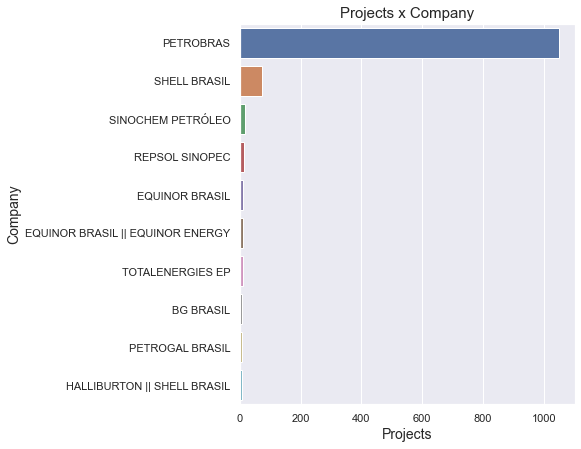

In [48]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Company', data=companies_project[:10], orient = 'h')

plt.title('Projects x Company',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()

### Dataframe of executing companies without sponsoring companies
#### This is a long cleaning of excluding sponsoring companies and merging registers of service companies

In [49]:
mask = companies['Company'].isin(data.PROPONENTE.values)
service_companies=companies[~mask]
service_companies.sort_values(by='Projects',ascending=[False],inplace=True)
service_companies.reset_index(drop=True, inplace=True)
service_companies

,Company,Projects,Revenue (R$ Millions)
0,HALLIBURTON || SHELL BRASIL,6,218.98
1,SCHLUMBERGER,5,18.28
2,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,4,32.18
3,PETRÓLEO BRASILEIRO S/A - PETROBRAS || SCHLUMB...,4,58.08
4,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,4,19.11
...,...,...,...
131,SHELL BRASIL || WELLTEC DO BRASIL LTDA.,1,7.94
132,ASV GLOBAL DO BRASIL LTDA. || FAROL SERVICOS E...,1,8.09
133,AVEVA DO BRASIL INFORMATICA LTDA || ENGINEERIN...,1,8.65
134,REPSOL SINOPEC || SIMEX SISTEMAS DE INSPECAO M...,1,8.91


In [50]:
service_companies.Company.unique()

array(['HALLIBURTON || SHELL BRASIL', 'SCHLUMBERGER',
       'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA || PETROGAL BRASIL',
       'PETRÓLEO BRASILEIRO S/A - PETROBRAS || SCHLUMBERGER || TOTALENERGIES EP',
       'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA || REPSOL SINOPEC',
       'SCHLUMBERGER || TOTALENERGIES EP', 'LTRACE TECNOLOGIA LTDA',
       'TECHNOMAR ENGENHARIA LTDA',
       'GEOWELLEX DO BRASIL || REPSOL SINOPEC',
       'INTELIE SOLUCOES EM INFORMATICA S.A. || SHELL BRASIL',
       'WIKKI BRASIL CONSULTORIA EM ENGENHARIA LTDA',
       'MARINE PRODUCTION SYSTEMS DO BRASIL LTDA || SHELL BRASIL',
       'ALIS SOLUCOES EM ENGENHARIA LTDA || REPSOL SINOPEC',
       'FMC TECHNOLOGIES DO BRASIL LTDA.                            ',
       'AKER SOLUTIONS DO BRASIL LTDA || EQUINOR ENERGY || TOTALENERGIES EP',
       'REPSOL SINOPEC || SOLPE - SOLUCOES EM CIENCIAS E ENGENHARIA DE PETROLEO LTDA',
       'DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADO

In [51]:
print(service_companies[service_companies['Company'].str.contains('HALLIBURTON', regex=False)])

                        Company  Projects  Revenue (R$ Millions)
0   HALLIBURTON || SHELL BRASIL         6                 218.98
30                  HALLIBURTON         2                   3.97


In [52]:
service_companies.loc[0,'Projects']+=service_companies.loc[30,'Projects']
service_companies.loc[0,'Revenue (R$ Millions)']+=service_companies.loc[30,'Revenue (R$ Millions)']
service_companies.loc[0,'Company'] = 'HALLIBURTON'
service_companies.drop(index=[30],inplace=True)

In [53]:
print(service_companies[service_companies['Company'].str.contains('SCHLUMBERGER', regex=False)])

                                              Company  Projects  \
1                                        SCHLUMBERGER         5   
3   PETRÓLEO BRASILEIRO S/A - PETROBRAS || SCHLUMB...         4   
5                    SCHLUMBERGER || TOTALENERGIES EP         4   
82   EQUINOR BRASIL || EQUINOR ENERGY || SCHLUMBERGER         1   
89                       SCHLUMBERGER || SHELL BRASIL         1   
97  BG BRASIL || SCHLUMBERGER SERVICOS DE PETROLEO...         1   

    Revenue (R$ Millions)  
1                   18.28  
3                   58.08  
5                   28.79  
82                   5.60  
89                  11.50  
97                  18.10  


In [54]:
service_companies.loc[1,'Projects']+=service_companies.loc[3,'Projects']+service_companies.loc[5,'Projects']+service_companies.loc[82,'Projects']+service_companies.loc[89,'Projects']+service_companies.loc[97,'Projects']
service_companies.loc[1,'Revenue (R$ Millions)']+=service_companies.loc[3,'Revenue (R$ Millions)']+service_companies.loc[5,'Revenue (R$ Millions)']+service_companies.loc[82,'Revenue (R$ Millions)']+service_companies.loc[89,'Revenue (R$ Millions)']+service_companies.loc[97,'Revenue (R$ Millions)']
service_companies.drop(index=[3,5,82,89,97],inplace=True)

In [55]:
print(service_companies[service_companies['Company'].str.contains('ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA', regex=False)])

                                               Company  Projects  \
2    ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         4   
4    ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         4   
18   ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         2   
28   ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...         2   
133  AVEVA DO BRASIL INFORMATICA LTDA || ENGINEERIN...         1   

     Revenue (R$ Millions)  
2                    32.18  
4                    19.11  
18                   12.33  
28                   24.28  
133                   8.65  


In [56]:
service_companies.loc[2,'Projects']+=service_companies.loc[4,'Projects']+service_companies.loc[18,'Projects']+service_companies.loc[28,'Projects']
service_companies.loc[2,'Revenue (R$ Millions)']+=service_companies.loc[4,'Revenue (R$ Millions)']+service_companies.loc[18,'Revenue (R$ Millions)']+service_companies.loc[28,'Revenue (R$ Millions)']
service_companies.loc[2,'Company'] = 'ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE LTDA'
service_companies.drop(index=[4,18,28],inplace=True)

In [57]:
print(service_companies[service_companies['Company'].str.contains('MARINE PRODUCTION SYSTEMS DO BRASIL LTDA', regex=False)])

                                              Company  Projects  \
11  MARINE PRODUCTION SYSTEMS DO BRASIL LTDA || SH...         3   
90           MARINE PRODUCTION SYSTEMS DO BRASIL LTDA         1   

    Revenue (R$ Millions)  
11                  91.47  
90                  11.74  


In [58]:
service_companies.loc[90,'Projects']+=service_companies.loc[11,'Projects']
service_companies.loc[90,'Revenue (R$ Millions)']+=service_companies.loc[11,'Revenue (R$ Millions)']
service_companies.drop(index=[11],inplace=True)

In [59]:
print(service_companies[service_companies['Company'].str.contains('ALIS SOLUCOES EM ENGENHARIA LTDA', regex=False)])

                                               Company  Projects  \
12   ALIS SOLUCOES EM ENGENHARIA LTDA || REPSOL SIN...         2   
100                   ALIS SOLUCOES EM ENGENHARIA LTDA         1   
106  ALIS SOLUCOES EM ENGENHARIA LTDA || PETROGAL B...         1   

     Revenue (R$ Millions)  
12                   32.38  
100                  19.11  
106                  37.38  


In [60]:
service_companies.loc[100,'Projects']+=service_companies.loc[12,'Projects']+service_companies.loc[106,'Projects']
service_companies.loc[100,'Revenue (R$ Millions)']+=service_companies.loc[12,'Revenue (R$ Millions)']+service_companies.loc[106,'Revenue (R$ Millions)']
service_companies.drop(index=[12,106],inplace=True)

In [61]:
print(service_companies[service_companies['Company'].str.contains('FMC TECHNOLOGIES DO BRASIL', regex=False)])

                                               Company  Projects  \
13   FMC TECHNOLOGIES DO BRASIL LTDA.              ...         2   
108  BG BRASIL || FMC TECHNOLOGIES DO BRASIL LTDA. ...         1   

     Revenue (R$ Millions)  
13                   84.72  
108                  10.11  


In [62]:
service_companies.loc[13,'Projects']+=service_companies.loc[108,'Projects']
service_companies.loc[13,'Revenue (R$ Millions)']+=service_companies.loc[108,'Revenue (R$ Millions)']
service_companies.loc[13,'Company'] = 'FMC TECHNOLOGIES DO BRASIL LTDA'
service_companies.drop(index=[108],inplace=True)

In [63]:
print(service_companies[service_companies['Company'].str.contains('AKER SOLUTIONS DO BRASIL LTDA', regex=False)])

                                               Company  Projects  \
14   AKER SOLUTIONS DO BRASIL LTDA || EQUINOR ENERG...         2   
36          AKER SOLUTIONS DO BRASIL LTDA || BG BRASIL         1   
124      AKER SOLUTIONS DO BRASIL LTDA || SHELL BRASIL         1   

     Revenue (R$ Millions)  
14                    7.37  
36                    1.06  
124                   5.69  


In [64]:
service_companies.loc[14,'Projects']+=service_companies.loc[36,'Projects']+service_companies.loc[124,'Projects']
service_companies.loc[14,'Revenue (R$ Millions)']+=service_companies.loc[36,'Revenue (R$ Millions)']+service_companies.loc[124,'Revenue (R$ Millions)']
service_companies.loc[14,'Company'] = 'AKER SOLUTIONS DO BRASIL LTDA'
service_companies.drop(index=[36,124],inplace=True)

In [65]:
print(service_companies[service_companies['Company'].str.contains('SOLPE', regex=False)])

                                              Company  Projects  \
15  REPSOL SINOPEC || SOLPE - SOLUCOES EM CIENCIAS...         2   

    Revenue (R$ Millions)  
15                  10.79  


In [66]:
service_companies.loc[15,'Company'] = 'SOLPE'

In [67]:
print(service_companies[service_companies['Company'].str.contains('DEEP SEED SOLUTIONS', regex=False)])

                                              Company  Projects  \
16  DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAM...         2   
52  DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAM...         1   

    Revenue (R$ Millions)  
16                  11.22  
52                   1.64  


In [68]:
service_companies.loc[16,'Projects']+=service_companies.loc[52,'Projects']
service_companies.loc[16,'Revenue (R$ Millions)']+=service_companies.loc[52,'Revenue (R$ Millions)']
service_companies.loc[16,'Company'] = 'DEEP SEED SOLUTIONS DESENVOLVIMENTO DE PROGRAMAS DE COMPUTADOR'
service_companies.drop(index=[52],inplace=True)

In [69]:
print(service_companies[service_companies['Company'].str.contains('WELLTEC', regex=False)]) 

                                     Company  Projects  Revenue (R$ Millions)
20      BG BRASIL || WELLTEC DO BRASIL LTDA.         2                  12.78
131  SHELL BRASIL || WELLTEC DO BRASIL LTDA.         1                   7.94


In [70]:
service_companies.loc[20,'Projects']+=service_companies.loc[131,'Projects']
service_companies.loc[20,'Revenue (R$ Millions)']+=service_companies.loc[131,'Revenue (R$ Millions)']
service_companies.loc[20,'Company'] = 'WELLTEC DO BRASIL LTDA'
service_companies.drop(index=[131],inplace=True)

In [71]:
print(service_companies[service_companies['Company'].str.contains('DET NORSKE VERITAS', regex=False)])

                                              Company  Projects  \
21                            DET NORSKE VERITAS LTDA         2   
57          DET NORSKE VERITAS LTDA || REPSOL SINOPEC         1   
72  DET NORSKE VERITAS LTDA || EQUINOR BRASIL || S...         1   

    Revenue (R$ Millions)  
21                   5.84  
57                   0.25  
72                   0.51  


In [72]:
service_companies.loc[21,'Projects']+=service_companies.loc[57,'Projects']+service_companies.loc[72,'Projects']
service_companies.loc[21,'Revenue (R$ Millions)']+=service_companies.loc[57,'Revenue (R$ Millions)']+service_companies.loc[72,'Revenue (R$ Millions)']
service_companies.drop(index=[57,72],inplace=True)

In [73]:
print(service_companies[service_companies['Company'].str.contains('ASV GLOBAL DO BRASIL', regex=False)])

                                               Company  Projects  \
22        ASV GLOBAL DO BRASIL LTDA. || REPSOL SINOPEC         2   
132  ASV GLOBAL DO BRASIL LTDA. || FAROL SERVICOS E...         1   

     Revenue (R$ Millions)  
22                   13.98  
132                   8.09  


In [74]:
service_companies.loc[22,'Projects']+=service_companies.loc[132,'Projects']
service_companies.loc[22,'Revenue (R$ Millions)']+=service_companies.loc[132,'Revenue (R$ Millions)']
service_companies.loc[22,'Company'] = 'ASV GLOBAL DO BRASIL LTDA'
service_companies.drop(index=[132],inplace=True)

In [75]:
print(service_companies[service_companies['Company'].str.contains('PARADIGM', regex=False)])

                                    Company  Projects  Revenue (R$ Millions)
25  PARADIGM GEOPHYSICAL || PETROGAL BRASIL         2                  14.52


In [76]:
service_companies.loc[25,'Company'] = 'PARADIGM GEOPHYSICAL'

In [77]:
print(service_companies[service_companies['Company'].str.contains('SBM OFFSHORE', regex=False)])

                                              Company  Projects  \
27       SBM OFFSHORE DO BRASIL LTDA. || SHELL BRASIL         2   
46  AMERICAN BUREAU OF SHIPPING || SBM OFFSHORE DO...         1   
58                       SBM OFFSHORE DO BRASIL LTDA.         1   

    Revenue (R$ Millions)  
27                  24.81  
46                   2.06  
58                   0.26  


In [78]:
service_companies.loc[27,'Projects']+=service_companies.loc[46,'Projects']+service_companies.loc[58,'Projects']
service_companies.loc[27,'Revenue (R$ Millions)']+=service_companies.loc[46,'Revenue (R$ Millions)']+service_companies.loc[58,'Revenue (R$ Millions)']
service_companies.loc[27,'Company'] = 'SBM OFFSHORE DO BRASIL LTDA'
service_companies.drop(index=[46,58],inplace=True)

In [79]:
print(service_companies[service_companies['Company'].str.contains('GE CENTRO BRASILEIRO', regex=False)])

                                               Company  Projects  \
29   BG BRASIL || GE CENTRO BRASILEIRO DE PESQUISAS...         2   
49   BG BRASIL || GE CENTRO BRASILEIRO DE PESQUISAS...         1   
109  EQUINOR BRASIL || GE CENTRO BRASILEIRO DE PESQ...         1   

     Revenue (R$ Millions)  
29                   22.74  
49                    1.41  
109                   9.43  


In [80]:
print(service_companies[service_companies['Company'].str.contains('GE OIL', regex=False)])

                                               Company  Projects  \
49   BG BRASIL || GE CENTRO BRASILEIRO DE PESQUISAS...         1   
114        GE OIL E GAS DO BRASIL LTDA || SHELL BRASIL         1   

     Revenue (R$ Millions)  
49                    1.41  
114                   3.71  


In [81]:
service_companies.loc[29,'Projects']+=service_companies.loc[49,'Projects']+service_companies.loc[109,'Projects']+service_companies.loc[114,'Projects']
service_companies.loc[29,'Revenue (R$ Millions)']+=service_companies.loc[49,'Revenue (R$ Millions)']+service_companies.loc[109,'Revenue (R$ Millions)']+service_companies.loc[114,'Revenue (R$ Millions)']
service_companies.loc[29,'Company'] = 'GE OIL E GAS DO BRASIL LTDA'
service_companies.drop(index=[49,109,114],inplace=True)

In [82]:
print(service_companies[service_companies['Company'].str.contains('SIMEROS', regex=False)])

                                               Company  Projects  \
32               SIMEROS PROJETOS ELETROMECANICOS LTDA         2   
45   EQUINOR BRASIL || SIMEROS PROJETOS ELETROMECAN...         1   
102  PETROGAL BRASIL || SIMEROS PROJETOS ELETROMECA...         1   
104  SHELL BRASIL || SIMEROS PROJETOS ELETROMECANIC...         1   

     Revenue (R$ Millions)  
32                   34.77  
45                    1.27  
102                  20.67  
104                  23.88  


In [83]:
service_companies.loc[32,'Projects']+=service_companies.loc[45,'Projects']+service_companies.loc[102,'Projects']+service_companies.loc[104,'Projects']
service_companies.loc[32,'Revenue (R$ Millions)']+=service_companies.loc[45,'Revenue (R$ Millions)']+service_companies.loc[102,'Revenue (R$ Millions)']+service_companies.loc[104,'Revenue (R$ Millions)']
service_companies.drop(index=[45,102,104],inplace=True)

In [84]:
print(service_companies[service_companies['Company'].str.contains('KOGNITUS', regex=False)]) 

                                               Company  Projects  \
54   KOGNITUS TECNOLOGIA, CONSULTORIA E SERVICOS LTDA.         1   
113  KOGNITUS TECNOLOGIA, CONSULTORIA E SERVICOS LT...         1   

     Revenue (R$ Millions)  
54                    0.85  
113                   3.39  


In [85]:
service_companies.loc[54,'Projects']+=service_companies.loc[113,'Projects']
service_companies.loc[54,'Revenue (R$ Millions)']+=service_companies.loc[113,'Revenue (R$ Millions)']
service_companies.drop(index=[113],inplace=True)

In [86]:
print(service_companies[service_companies['Company'].str.contains('ONESUBSEA DO ', regex=False)]) 

                                               Company  Projects  \
42   BG BRASIL || ONESUBSEA DO BRASIL SERVICOS SUBM...         1   
60   EQUINOR BRASIL || ONESUBSEA DO BRASIL SERVICOS...         1   
130  ONESUBSEA DO BRASIL SERVICOS SUBMARINOS LTDA |...         1   

     Revenue (R$ Millions)  
42                    1.22  
60                    0.37  
130                   7.45  


In [87]:
service_companies.loc[42,'Projects']+=service_companies.loc[60,'Projects']+service_companies.loc[130,'Projects']
service_companies.loc[42,'Revenue (R$ Millions)']+=service_companies.loc[60,'Revenue (R$ Millions)']+service_companies.loc[130,'Revenue (R$ Millions)']
service_companies.loc[42,'Company'] = 'ONESUBSEA DO BRASIL SERVICOS SUBMARINOS LTDA'
service_companies.drop(index=[60,130],inplace=True)

In [88]:
print(service_companies[service_companies['Company'].str.contains('INVISION', regex=False)]) 

                       Company  Projects  Revenue (R$ Millions)
43                    INVISION         1                   2.48
83  INVISION || REPSOL SINOPEC         1                   2.89


In [89]:
service_companies.loc[43,'Projects']+=service_companies.loc[83,'Projects']
service_companies.loc[43,'Revenue (R$ Millions)']+=service_companies.loc[83,'Revenue (R$ Millions)']
service_companies.drop(index=[83],inplace=True)

In [90]:
print(service_companies[service_companies['Company'].str.contains('ACCENTURE', regex=False)]) 

                                               Company  Projects  \
37   ACCENTURE DO BRASIL LTDA. || PARNAÍBA GÁS NATURAL         1   
129           ACCENTURE DO BRASIL LTDA || SHELL BRASIL         1   

     Revenue (R$ Millions)  
37                    1.14  
129                   7.03  


In [91]:
service_companies.loc[37,'Projects']+=service_companies.loc[129,'Projects']
service_companies.loc[37,'Revenue (R$ Millions)']+=service_companies.loc[129,'Revenue (R$ Millions)']
service_companies.loc[37,'Company'] = 'ACCENTURE DO BRASIL LTDA '
service_companies.drop(index=[129],inplace=True)

In [92]:
print(service_companies[service_companies['Company'].str.contains('SUBSEA7 DO BRASIL', regex=False)]) 

                                               Company  Projects  \
40   EQUINOR BRASIL || REPSOL SINOPEC || SUBSEA7 DO...         1   
62   EQUINOR ENERGY || SUBSEA7 DO BRASIL SERVICOS LTDA         1   
117  EQUINOR ENERGY || REPSOL SINOPEC || SUBSEA7 DO...         1   

     Revenue (R$ Millions)  
40                    1.21  
62                    0.42  
117                   4.77  


In [93]:
service_companies.loc[40,'Projects']+=service_companies.loc[62,'Projects']+service_companies.loc[117,'Projects']
service_companies.loc[40,'Revenue (R$ Millions)']+=service_companies.loc[62,'Revenue (R$ Millions)']+service_companies.loc[117,'Revenue (R$ Millions)']
service_companies.loc[40,'Company'] = 'SUBSEA7 DO BRASIL SERVICOS LTDA'
service_companies.drop(index=[62,117],inplace=True)

In [94]:
print(service_companies[service_companies['Company'].str.contains('PHDSOFT TECNOLOGIA', regex=False)]) 

                                    Company  Projects  Revenue (R$ Millions)
80                  PHDSOFT TECNOLOGIA LTDA         1                   0.81
96  PHDSOFT TECNOLOGIA LTDA || SHELL BRASIL         1                  17.47


In [95]:
service_companies.loc[80,'Projects']+=service_companies.loc[96,'Projects']
service_companies.loc[80,'Revenue (R$ Millions)']+=service_companies.loc[96,'Revenue (R$ Millions)']
service_companies.drop(index=[96],inplace=True)

In [96]:
print(service_companies[service_companies['Company'].str.contains('AVEVA', regex=False)]) 

                                               Company  Projects  \
84   AVEVA DO BRASIL INFORMATICA LTDA || REPSOL SIN...         1   
93    AVEVA DO BRASIL INFORMATICA LTDA || SHELL BRASIL         1   
133  AVEVA DO BRASIL INFORMATICA LTDA || ENGINEERIN...         1   

     Revenue (R$ Millions)  
84                    9.56  
93                   13.80  
133                   8.65  


In [97]:
service_companies.loc[84,'Projects']+=service_companies.loc[93,'Projects']+service_companies.loc[133,'Projects']
service_companies.loc[84,'Revenue (R$ Millions)']+=service_companies.loc[93,'Revenue (R$ Millions)']+service_companies.loc[133,'Revenue (R$ Millions)']
service_companies.loc[84,'Company'] = 'AVEVA DO BRASIL INFORMATICA LTDA'
service_companies.drop(index=[93,133],inplace=True)

In [98]:
print(service_companies[service_companies['Company'].str.contains('SAIPEM DO BRASIL SERVIÇOS DE PETRÓLEO LTDA', regex=False)])

                                               Company  Projects  \
99   PETROBRAS || SAIPEM DO BRASIL SERVIÇOS DE PETR...         1   
105  SAIPEM DO BRASIL SERVIÇOS DE PETRÓLEO LTDA || ...         1   

     Revenue (R$ Millions)  
99                   19.02  
105                  32.87  


In [99]:
service_companies.loc[99,'Projects']+=service_companies.loc[105,'Projects']
service_companies.loc[99,'Revenue (R$ Millions)']+=service_companies.loc[105,'Revenue (R$ Millions)']
service_companies.loc[99,'Company'] = 'SAIPEM DO BRASIL SERVIÇOS DE PETRÓLEO LTDA'
service_companies.drop(index=[105],inplace=True)

In [100]:
print(service_companies[service_companies['Company'].str.contains('PETREC', regex=False)]) 

                       Company  Projects  Revenue (R$ Millions)
112   PETREC || REPSOL SINOPEC         1                   3.06
127  PETREC || PETROGAL BRASIL         1                   6.22


In [101]:
service_companies.loc[112,'Projects']+=service_companies.loc[127,'Projects']
service_companies.loc[112,'Revenue (R$ Millions)']+=service_companies.loc[127,'Revenue (R$ Millions)']
service_companies.loc[112,'Company'] = 'PETREC'
service_companies.drop(index=[127],inplace=True)

In [102]:
print(service_companies[service_companies['Company'].str.contains('GEOWELLEX', regex=False)]) 

                                 Company  Projects  Revenue (R$ Millions)
8  GEOWELLEX DO BRASIL || REPSOL SINOPEC         3                  23.09


In [103]:
service_companies.loc[8,'Company'] = 'GEOWELLEX'

In [104]:
print(service_companies[service_companies['Company'].str.contains('PROOCEANO', regex=False)]) 

                                              Company  Projects  \
23  PROOCEANO SERVIÇO OCEANOGRÁFICO E AMBIENTAL LT...         2   

    Revenue (R$ Millions)  
23                  32.68  


In [105]:
service_companies.loc[23,'Company'] = 'PROOCEANO SERVIÇO OCEANOGRÁFICO E AMBIENTAL LTDA'

In [106]:
print(service_companies[service_companies['Company'].str.contains('INTELIE', regex=False)]) 

                                             Company  Projects  \
9  INTELIE SOLUCOES EM INFORMATICA S.A. || SHELL ...         3   

   Revenue (R$ Millions)  
9                  23.20  


In [107]:
service_companies.loc[9,'Company'] = 'INTELIE SOLUCOES EM INFORMATICA S.A.'

In [108]:
print(service_companies[service_companies['Company'].str.contains('IBM', regex=False)]) 

                           Company  Projects  Revenue (R$ Millions)
103  IBM BRASIL || PETROGAL BRASIL         1                  22.73


In [109]:
service_companies.loc[103,'Company'] = 'IBM BRASIL'

In [110]:
print(service_companies[service_companies['Company'].str.contains('CAMERAN', regex=False)]) 

                                               Company  Projects  \
107  CAMERAN DO BRASIL LTDA || EQUINOR ENERGY || TO...         1   

     Revenue (R$ Millions)  
107                  86.40  


In [111]:
service_companies.loc[107,'Company'] = 'CAMERAN DO BRASIL LTDA'

In [112]:
print(service_companies[service_companies['Company'].str.contains('STROHM', regex=False)]) 

                                               Company  Projects  \
123  SHELL BRASIL || STROHM BRASIL DUTOS COMPOSITOS...         1   

     Revenue (R$ Millions)  
123                  99.76  


In [113]:
service_companies.loc[123,'Company'] = 'STROHM BRASIL DUTOS COMPOSITOS TERMOPLASTICOS LTDA'

### Top 20 service companies by Projects

In [114]:
service_companies.sort_values(by='Projects',ascending=[False], inplace=True)
service_companies

,Company,Projects,Revenue (R$ Millions)
1,SCHLUMBERGER,16,140.35
2,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,12,87.90
0,HALLIBURTON,8,222.95
32,SIMEROS PROJETOS ELETROMECANICOS LTDA,5,80.58
29,GE OIL E GAS DO BRASIL LTDA,5,37.29
...,...,...,...
74,UNIDROID ROBOTICA DO BRASIL LTDA,1,0.66
75,GEOESPAÇO SENSORIAMENTO REMOTO E GEOLOGIA DO P...,1,0.70
76,OIL FINDER SERVICOS DE SENSORIAMENTO REMOTO E ...,1,0.72
77,NAKED MONKEY LTDA,1,0.78


In [115]:
service_project_20=[]
service_project_20=service_companies[:19]
service_project_20.loc[len(service_project_20.index)] = ['OTHERS',sum(service_companies['Projects'][19:]),0]

In [116]:
service_project_20

,Company,Projects,Revenue (R$ Millions)
1,SCHLUMBERGER,16,140.35
2,ENGINEERING SIMULATION AND SCIENTIFIC SOFTWARE...,12,87.90
0,HALLIBURTON,8,222.95
32,SIMEROS PROJETOS ELETROMECANICOS LTDA,5,80.58
29,GE OIL E GAS DO BRASIL LTDA,5,37.29
90,MARINE PRODUCTION SYSTEMS DO BRASIL LTDA,4,103.21
100,ALIS SOLUCOES EM ENGENHARIA LTDA,4,88.87
14,AKER SOLUTIONS DO BRASIL LTDA,4,14.12
27,SBM OFFSHORE DO BRASIL LTDA,4,27.13
21,DET NORSKE VERITAS LTDA,4,6.61


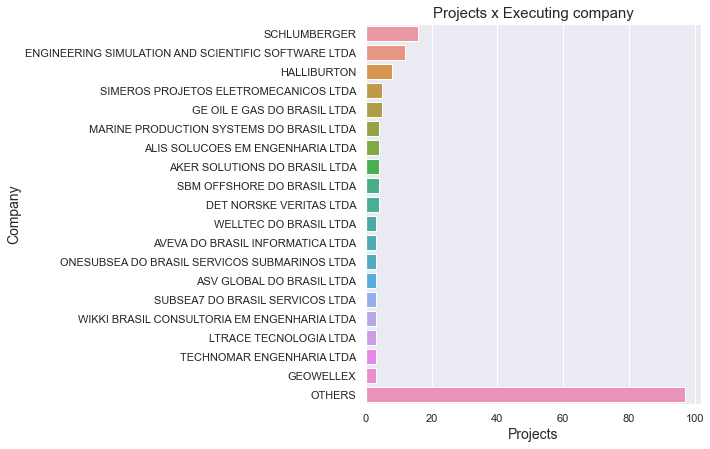

In [117]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Projects', y='Company', data=service_project_20, orient = 'h')

plt.title('Projects x Executing company',fontsize=15)
plt.xlabel('Projects',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()

### Top 20 service companies by Revenue

In [118]:
service_companies.sort_values(by='Revenue (R$ Millions)',ascending=[False], inplace=True)
service_companies

,Company,Projects,Revenue (R$ Millions)
0,HALLIBURTON,8,222.95
1,SCHLUMBERGER,16,140.35
90,MARINE PRODUCTION SYSTEMS DO BRASIL LTDA,4,103.21
123,STROHM BRASIL DUTOS COMPOSITOS TERMOPLASTICOS ...,1,99.76
13,FMC TECHNOLOGIES DO BRASIL LTDA,3,94.84
...,...,...,...
63,THE INSIGHT - ARTIFICIAL INTELIGENCE LTDA,1,0.47
61,"PS SOLUCOES INDUSTRIA, COMERCIO, REPRESENTACOE...",1,0.42
59,"EQUINOR BRASIL || INNOCEAN PESQUISA, DESENVOLV...",1,0.29
56,DERSALIS BRASIL TECNOLOGIA E INOVACOES EM SAUD...,1,0.12


In [119]:
service_revenue_10=[]
service_revenue_10=service_companies[:19]
service_revenue_10.loc[len(service_revenue_10.index)] = ['OTHERS',0,sum(service_companies['Revenue (R$ Millions)'][19:])]

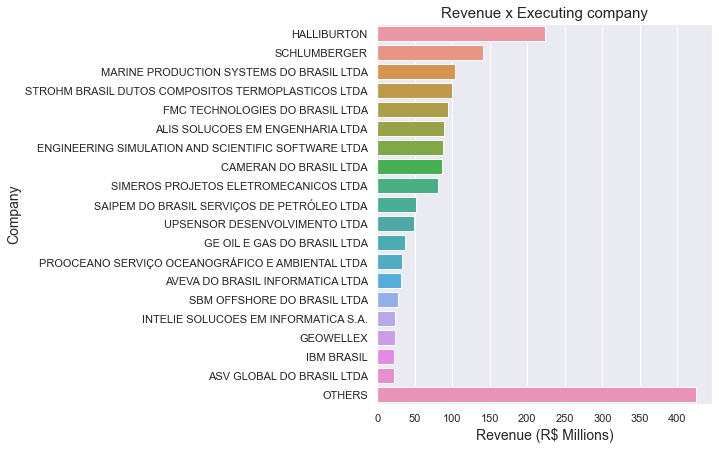

In [120]:
sns.set()
plt.figure(figsize = (6,7))

sns.barplot(x='Revenue (R$ Millions)', y='Company', data=service_revenue_10, orient = 'h')

plt.title('Revenue x Executing company',fontsize=15)
plt.xlabel('Revenue (R$ Millions)',fontsize=14)
plt.ylabel('Company',fontsize=14)
plt.show()